## ONLINE STORE SEGMENTATION

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

Attribute Information:

    InvoiceNo: A unique 6-digit integral number assigned to each transaction. If the code starts with the letter 'c', it indicates a cancellation.
    StockCode: A 5-digit integral number uniquely identifying each distinct product.
    Description: The name of the product (item).
    Quantity: The quantity of each product (item) per transaction.
    InvoiceDate: The date and time when the transaction was generated.
    UnitPrice: The unit price of the product in sterling (£).
    CustomerID: A unique 5-digit integral number assigned to each customer.
    Country: The name of the country where the customer resides.

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

* [Importing The Libraries.](#Importing-libraries)
* [Loading and Reading Dataset from the Archives](#Loading-and-Reading-Datasets)
* [Investigating the Dataset Information](#Investigating-the-Dataset-Information)
* [Data Transformation](#Data-Transformation)
* [Refined Data Representation and Feature Enhancement](#Refined-Data-Representation-and-Feature-Enhancement)

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Importing-libraries" style="text-align: center;">Importing libraries</h2>

In [9]:
import pandas as pd

import numpy as np

# import zipfile

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

import my_func

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Loading-and-Reading-Datasets" style="text-align: center;">Loading and Reading Dataset from the Archives</h2>

In [10]:
archive_path = 'archive.zip'
dataframes_in_zip = my_func.read_csv_files_from_zip(archive_path)
print(f'Amount of datasets: {len(dataframes_in_zip)}')
print(f'Files in zip: {list(dataframes_in_zip.keys())}')

Amount of datasets: 1
Files in zip: ['online_retail.csv']


**Ther is only one file *online_retail.csv***

In [11]:
df_online_retail = dataframes_in_zip['online_retail.csv']
origin_df = df_online_retail.copy()
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  


<h2 id="Investigating-the-Dataset-Information" style="text-align: center;">Investigating the Dataset Information</h2>

In [12]:
my_func.review_dataframe(df_online_retail)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
--------------------------------------------------------- DATA TYPES -------------------------------------------------

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Data-Transformation" style="text-align: center;">Data Transformation</h2>

In [13]:
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#  Removing cacellation
df_online_retail = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

In [15]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",df_online_retail.shape)
df_online_retail.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",df_online_retail.shape)

Shape of data before removing NaN's CustomerID (532621, 8)
Shape of data after removing NaN's CustomerID (397924, 8)


C:\Users\gpapu\AppData\Local\Temp\ipykernel_12640\2798346395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online_retail.dropna(subset="CustomerID",axis=0,inplace=True)


In [16]:
print("Missing values in each column after cleaning customerID :\n",df_online_retail.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [17]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df_online_retail.duplicated().sum())
df_online_retail = df_online_retail.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df_online_retail.duplicated().sum())

Number of duplicates before cleaning: 5192
Number of duplicates after cleaning: 0


In [19]:
# Cheking for negative values
print("Negative value in Quantity:",(df_online_retail.Quantity<0).sum())
print("Negative value in UnitPrice:",(df_online_retail.UnitPrice<0).sum())


Negative value in Quantity: 0
Negative value in UnitPrice: 0


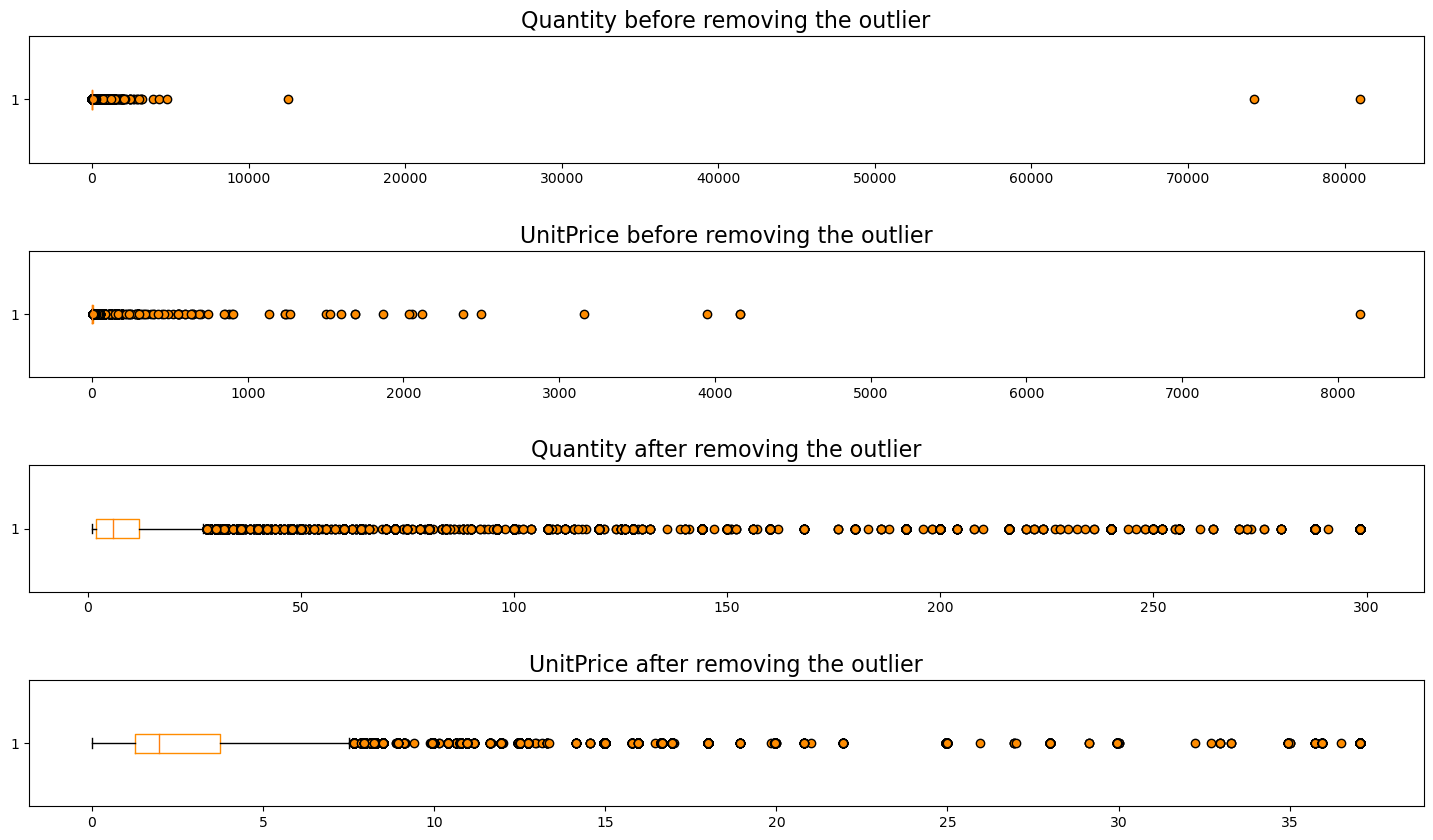

In [20]:
# Observing them before removing outliers.
f, ax = plt.subplots(nrows=4, ncols=1, figsize = (18,10))
# Adjust the vertical spacing between subplots
f.subplots_adjust(hspace=0.7)
col_list = ["Quantity","UnitPrice"]
# Plotting before and after removing outliers
for i, col in enumerate(col_list):
    
    # Plot before removing outliers
    ax[i].boxplot(df_online_retail[col], 
                  sym='o', 
                  vert=False, 
                  showfliers=True, 
                  boxprops=dict(color='#FF8C00'), 
                  flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i].set_title(f'{col} before removing the outlier', fontsize=16)
    
    # Remove outliers and plot after removing outliers
    df_online_retail = my_func.replace_with_threshold(df_online_retail, col, 0.01, 1.5)
    ax[i + 2].boxplot(df_online_retail[col], 
                      sym='o', 
                      vert=False, 
                      showfliers=True, 
                      boxprops=dict(color='#FF8C00'), 
                      flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i + 2].set_title(f'{col} after removing the outlier', fontsize=16)

# Show the plot
plt.show()

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country



<h2 id="Refined-Data-Representation-and-Feature-Enhancement" style="text-align: center;">Refined Data Representation and Feature Enhancement</h2>

In [47]:
# Calculate the total order amount for each row (UnitPrice * Quantity)
df_online_retail['TotalPrice'] = df_online_retail['UnitPrice'] * df_online_retail['Quantity']

# Determining order cancellation
df_online_retail['Cancellation'] = df_online_retail['InvoiceNo'].str.contains('C', na=False)

# InvoiceDate to date type
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])
df_online_retail.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
TotalPrice             float64
Cancellation              bool
dtype: object

In [48]:
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False


In [49]:
df_with_cancellation = df_online_retail.query('Cancellation == True')
df_non_cancelled = df_online_retail.query('Cancellation == False')

In [50]:
df_with_cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.0,United Kingdom,-27.500,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.0,United Kingdom,-4.650,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.0,United Kingdom,-19.800,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.0,United Kingdom,-9.130,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,37.185,15498.0,United Kingdom,-37.185,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.0,United Kingdom,-54.750,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.0,United Kingdom,-1.250,True


In [52]:
df_non_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False


In [62]:
# Объединяем два DataFrame по условиям 'Description', 'CustomerID' и 'Quantity'
merged_df = df_non_cancelled.merge(df_with_cancellation, on=['Description', 'CustomerID', 'StockCode'], suffixes=('_non_cancelled', '_cancelled'))

# Фильтруем строки, где df_with_cancellation.Quantity меньше или равно df_non_cancelled.Quantity
filtered_df = merged_df[merged_df['Quantity_cancelled'] <= merged_df['Quantity_non_cancelled']]

# Выбираем первую строку, которая удовлетворяет условиям
result_df = filtered_df.groupby(['Description', 'CustomerID']).first().reset_index()
result_df['Diff_Quantity'] = result_df['Quantity_non_cancelled'] + result_df['Quantity_cancelled']
result_df['Diff_TotalPrice'] = result_df['TotalPrice_non_cancelled'] + result_df['TotalPrice_cancelled']
result_df


,Description,CustomerID,InvoiceNo_non_cancelled,StockCode,Quantity_non_cancelled,InvoiceDate_non_cancelled,UnitPrice_non_cancelled,Country_non_cancelled,TotalPrice_non_cancelled,Cancellation_non_cancelled,InvoiceNo_cancelled,Quantity_cancelled,InvoiceDate_cancelled,UnitPrice_cancelled,Country_cancelled,TotalPrice_cancelled,Cancellation_cancelled,Diff_Quantity,Diff_TotalPrice
0,50'S CHRISTMAS GIFT BAG LARGE,13136.0,571224,23437,12,2011-10-14 13:41:00,1.25,United Kingdom,15.00,False,C572111,-2,2011-10-20 19:13:00,1.25,United Kingdom,-2.50,True,10,12.50
1,DOLLY GIRL BEAKER,13418.0,562592,23345,12,2011-08-07 15:43:00,1.25,United Kingdom,15.00,False,C567543,-6,2011-09-21 10:19:00,1.25,United Kingdom,-7.50,True,6,7.50
2,OVAL WALL MIRROR DIAMANTE,15005.0,543020,22167,1,2011-02-02 14:29:00,9.95,United Kingdom,9.95,False,C556888,-1,2011-06-15 12:37:00,9.95,United Kingdom,-9.95,True,0,0.00
3,OVAL WALL MIRROR DIAMANTE,15532.0,539294,22167,3,2010-12-16 16:45:00,9.95,United Kingdom,29.85,False,C558097,-2,2011-06-26 13:29:00,9.95,United Kingdom,-19.90,True,1,9.95
4,OVAL WALL MIRROR DIAMANTE,17612.0,552353,22167,1,2011-05-09 12:14:00,9.95,United Kingdom,9.95,False,C553533,-1,2011-05-17 15:13:00,9.95,United Kingdom,-9.95,True,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,ZINC T-LIGHT HOLDER STARS SMALL,14397.0,552575,23144,12,2011-05-10 12:25:00,0.83,United Kingdom,9.96,False,C581490,-11,2011-12-09 09:57:00,0.83,United Kingdom,-9.13,True,1,0.83
6942,ZINC T-LIGHT HOLDER STARS SMALL,16859.0,560366,23144,12,2011-07-18 12:19:00,0.83,United Kingdom,9.96,False,C564488,-9,2011-08-25 14:12:00,0.83,United Kingdom,-7.47,True,3,2.49
6943,ZINC T-LIGHT HOLDER STARS SMALL,17504.0,552057,23144,24,2011-05-06 10:34:00,0.83,United Kingdom,19.92,False,C552556,-24,2011-05-10 11:21:00,0.83,United Kingdom,-19.92,True,0,0.00
6944,ZINC TOP 2 DOOR WOODEN SHELF,14217.0,537809,21275,1,2010-12-08 13:28:00,16.95,United Kingdom,16.95,False,C538114,-1,2010-12-09 15:29:00,16.95,United Kingdom,-16.95,True,0,0.00


In [ ]:

# Group the data by month and count the number of orders in each month
cancelled_orders_by_month = df_with_cancellation \
    .groupby(df_with_cancellation['InvoiceDate'] \
    .dt.to_period('M'))['InvoiceNo'].count() \
    .reset_index() \
    .rename(columns={'InvoiceNo': 'MonthScore'})
non_cancelled_by_month = df_non_cancelled \
    .groupby(df_non_cancelled['InvoiceDate'] \
    .dt.to_period('M'))['InvoiceNo'].count() \
    .reset_index() \
    .rename(columns={'InvoiceNo': 'MonthScore'})


<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Orders by Month

In [ ]:
# Размеры графиков на одной фигуре
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(cancelled_orders_by_month['InvoiceDate'].astype(str), 
        cancelled_orders_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Amount orders')
plt.title('Cancelled orders')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(non_cancelled_by_month['InvoiceDate'].astype(str), 
        non_cancelled_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Amount orders')
plt.title('Non Cancelled orders')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(non_cancelled_by_month['InvoiceDate'].astype(str), 
        cancelled_orders_by_month['MonthScore']/non_cancelled_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Ratio')
plt.title('Cancelled orders / All Orders')
plt.xticks(rotation=90)

plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Corellation matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_online_retail[['Quantity','UnitPrice','CustomerID', 'TotalPrice', 'Cancellation']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Размеры графика
plt.figure(figsize=(19, 6))
plt.subplot(1, 3, 1)
# Строим диаграмму рассеяния
plt.scatter(df_online_retail['Quantity'], df_online_retail['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('All Products')


plt.subplot(1, 3, 2)
# Строим диаграмму рассеяния
plt.scatter(df_with_cancellation['Quantity'], df_with_cancellation['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('Cancelled Products')


plt.subplot(1, 3, 3)
# Строим диаграмму рассеяния
plt.scatter(df_non_cancelled['Quantity'], df_non_cancelled['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('Non Cancelled Products')


# Показываем график
plt.show()




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Linear regression model

In [ ]:
import statsmodels.api as sm
X = df_non_cancelled['Quantity']  # Независимая переменная (предиктор)
y = df_non_cancelled['TotalPrice']  # Зависимая переменная (целевая переменная)

# Добавляем константу для модели (y = b0 + b1*X)
X = sm.add_constant(X)

# Создаем и обучаем модель линейной регрессии
model = sm.OLS(y, X).fit()

# Получаем результаты регрессионного анализа
print(model.summary())

In [ ]:
plt.scatter(df_non_cancelled['Quantity'], df_non_cancelled['TotalPrice'], alpha=0.5)
plt.plot(df_non_cancelled['Quantity'], model.predict(X), color='red')
plt.xlabel('Количество товаров')
plt.ylabel('Общая стоимость')
plt.title('Линейная регрессия: Количество товаров vs Общая стоимость')
plt.show()


R-квадрат (R-squared): Значение R-квадрат (R-squared) равно 0.416, что означает, что около 41.6% дисперсии зависимой переменной (TotalPrice) объясняется независимой переменной (Quantity). Это показывает относительную силу связи между этими переменными. Оставшиеся 58.4% дисперсии объясняются другими факторами, которые не учтены в данной модели.

Коэффициенты: В уравнении регрессии приведены значения коэффициентов. Константа (const) имеет значение 5.2066, что означает ожидаемое значение зависимой переменной при Quantity = 0 (хотя в данной задаче значение Quantity не может быть равно нулю). Коэффициент Quantity равен 1.3078, что говорит о том, что с увеличением Quantity на единицу, TotalPrice ожидается увеличиться на 1.3078 единиц.

P-значения (P>|t|): P-значения для коэффициентов показывают статистическую значимость связи между каждым из коэффициентов и зависимой переменной. Оба коэффициента имеют P-значение равное нулю, что говорит о том, что связь статистически значима.

F-статистика и Prob (F-statistic): F-статистика равна 2.801e+05, а Prob (F-statistic) равно нулю, что указывает на общую статистическую значимость модели регрессии в целом.

Omnibus, Durbin-Watson, Jarque-Bera и Kurtosis: Это статистические показатели, которые помогают оценить адекватность модели. Высокое значение Kurtosis может указывать на аномалии в данных.

Cond. No.: Значение Cond. No. отражает мультиколлинеарность (наличие корреляции между независимыми переменными). Здесь значение Cond. No. равно 31.5, что обычно не является проблемой.

Общий вывод: В данном анализе мы построили линейную регрессию для объяснения зависимой переменной TotalPrice на основе независимой переменной Quantity. Модель имеет статистически значимую связь, но R-квадрат показывает, что модель объясняет только часть дисперсии. Для повышения объяснительной способности модели можно попробовать добавить дополнительные независимые переменные или использовать другую функциональную форму регрессии, если это соответствует характеру данных. Также стоит проверить предпосылки линейной регрессии, такие как нормальность остатков и гомоскедастичность.

### Conclusion of Linear Regression Model
1. R-squared: The value of R-squared is 0.416, which means that about 41.6% of the variance of the dependent variable (TotalPrice) is explained by the independent variable (Quantity). This shows the relative strength of the relationship between these variables. The remaining 58.4% of the variance is explained by other factors that are not accounted for in this model.

2. Coefficients: The regression equation shows the values of the coefficients. The constant (const) has a value of 5.2066, which means the expected value of the dependent variable when Quantity = 0 (although Quantity cannot be zero in this problem). The Quantity coefficient is 1.3078, indicating that as Quantity increases by one unit, TotalPrice is expected to increase by 1.3078 units.

3. P-values (P>|t|): P-values for the coefficients show the statistical significance of the relationship between each of the coefficients and the dependent variable. Both coefficients have P-values equal to zero, indicating that the relationship is statistically significant.

4. F-statistic and Prob (F-statistic): F-statistic is equal to 2.801e+05 and Prob (F-statistic) is equal to zero, indicating the overall statistical significance of the regression model as a whole.

5. Omnibus, Durbin-Watson, Jarque-Bera and Kurtosis: These are statistical measures that help to assess the adequacy of the model. A high value of Kurtosis may indicate anomalies in the data.

6. Cond. No.: The value of Cond. No. reflects multicollinearity (presence of correlation between independent variables). Here, the value of Cond. No. is 31.5, which is usually not a problem.

7. Overall conclusion: In this analysis, we have constructed a linear regression to explain the dependent variable TotalPrice based on the independent variable Quantity. The model has a statistically significant relationship, but the R-square shows that the model explains only a portion of the variance. To increase the explanatory power of the model, you could try adding additional independent variables or using a different functional form of regression if it fits the nature of the data. It is also worth checking the assumptions of linear regression, such as normality of residuals and homoscedasticity.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
df_online_retail

In [ ]:
df_online_retail.groupby(["CustomerID", "InvoiceNo"]).agg({'Quantity': 'sum', 'InvoiceDate': 'count'})

In [ ]:
df_online_retail.query("InvoiceNo == 'C541433'")

In [ ]:
df_online_retail.query("InvoiceNo == '541431'")

In [ ]:
c_12347 = df_online_retail.query("CustomerID == 12347.0")
c_12347[c_12347.InvoiceNo.str.contains('C', na=False)]

In [ ]:
df_online_retail.que

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

In [17]:
df_with_cancellation = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_with_cancellation['Cancelled'] = 1
df_with_cancellation

C:\Users\gpapu\AppData\Local\Temp\ipykernel_9764\3599027369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_cancellation['Cancelled'] = 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,44.715,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.0,United Kingdom,1


In [19]:
df_non_cancelled = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_non_cancelled['Cancelled'] = 0
df_non_cancelled

C:\Users\gpapu\AppData\Local\Temp\ipykernel_9764\1407255106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_cancelled['Cancelled'] = 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [ ]:
# Объедините два датасета в один для анализа
combined_df = pd.concat([df_with_cancellation, df_non_cancelled], ignore_index=True)
combined_df

In [ ]:
df_corr = combined_df[['Quantity','UnitPrice','TotalPrice', 'Cancelled', 'Country']].corr()
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')

In [28]:
# Цикл для каждой строки в df_with_cancellation
for index, row in df_with_cancellation.iterrows():
    
    # Находим соответствующую строку в df_non_cancelled по Description и CustomerID
    mask = (df_non_cancelled['Description'] == row['Description']) & \
        (df_non_cancelled['CustomerID'] == row['CustomerID']) & (df_non_cancelled['Quantity'] > row['Quantity'])
    matched_row = df_non_cancelled[mask]
    if not (matched_row.empty):
        print(row)
        print('\nmatch: ', matched_row)
        break
    

InvoiceNo                              C536383
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
Quantity                                    -1
InvoiceDate                2010-12-01 09:49:00
UnitPrice                                 4.65
CustomerID                             15311.0
Country                         United Kingdom
Cancelled                                    1
Name: 154, dtype: object

match:        InvoiceNo StockCode                      Description  Quantity  \
9200     537195    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
28630    538651    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
44157    540157    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
59542    541293    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  Cancelled  
9200   2010-12-05 13:55:00       4.65     15311.0  United Kingdom          0  
28630  2010-12-13 15:07:

In [37]:
# Предположим, что у вас уже есть два DataFrame: df_non_cancelled и df_with_cancellation

# Слияние двух DataFrame на основе 'Description' и 'CustomerID'
merged_df = pd.merge(df_with_cancellation, df_non_cancelled, on=['Description', 'CustomerID', 'StockCode'], suffixes=('_with_cancel', '_non_cancel'))

# Фильтрация по условиям Quantity_with_cancel < Quantity_non_cancel
result_df = merged_df[merged_df['Quantity_with_cancel'] < merged_df['Quantity_non_cancel']]
rr = result_df[result_df['InvoiceDate_non_cancel'] < result_df['InvoiceDate_with_cancel']]

# Удаление лишних столбцов
# result_df = result_df.drop(columns=['Quantity_with_cancel', 'InvoiceDate_with_cancel', 'Country_with_cancel'])

# Вывод результата
rr











,InvoiceNo_with_cancel,StockCode,Description,Quantity_with_cancel,InvoiceDate_with_cancel,UnitPrice_with_cancel,CustomerID,Country_with_cancel,Cancelled_with_cancel,InvoiceNo_non_cancel,Quantity_non_cancel,InvoiceDate_non_cancel,UnitPrice_non_cancel,Country_non_cancel,Cancelled_non_cancel
4,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311.0,United Kingdom,1,537195,12,2010-12-05 13:55:00,4.65,United Kingdom,0
8,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311.0,United Kingdom,1,537195,12,2010-12-05 13:55:00,4.65,United Kingdom,0
9,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311.0,United Kingdom,1,538651,12,2010-12-13 15:07:00,4.65,United Kingdom,0
12,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311.0,United Kingdom,1,537195,12,2010-12-05 13:55:00,4.65,United Kingdom,0
13,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311.0,United Kingdom,1,538651,12,2010-12-13 15:07:00,4.65,United Kingdom,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1,548150,36,2011-03-29 12:55:00,1.06,United Kingdom,0
23244,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1,550828,6,2011-04-21 10:19:00,1.25,United Kingdom,0
23245,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1,552537,36,2011-05-10 10:11:00,1.06,United Kingdom,0
23246,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1,566624,12,2011-09-14 09:36:00,1.25,United Kingdom,0


In [38]:
(rr['UnitPrice_non_cancel'] == rr['UnitPrice_with_cancel']).sum()

13201

In [39]:
(rr['UnitPrice_non_cancel'] > rr['UnitPrice_with_cancel']).sum()

837

In [40]:
(rr['UnitPrice_non_cancel'] < rr['UnitPrice_with_cancel']).sum()

1106

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\2633248175.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\2633248175.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2011-12-09 11:58:00


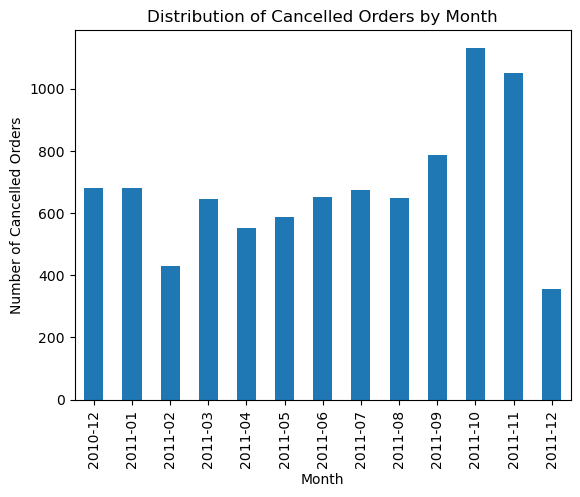

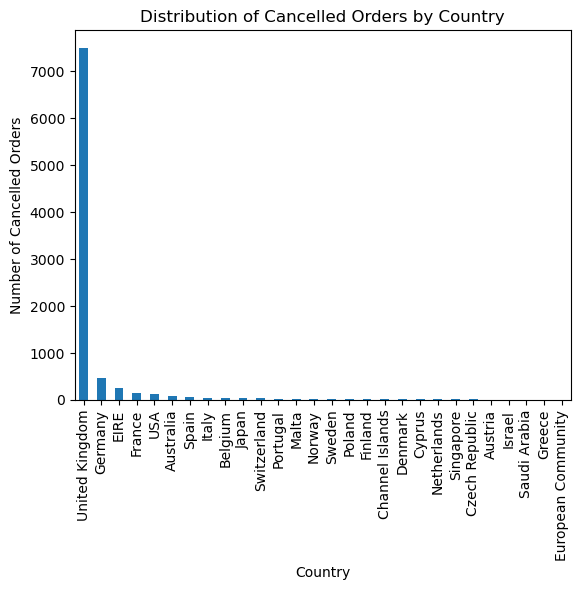

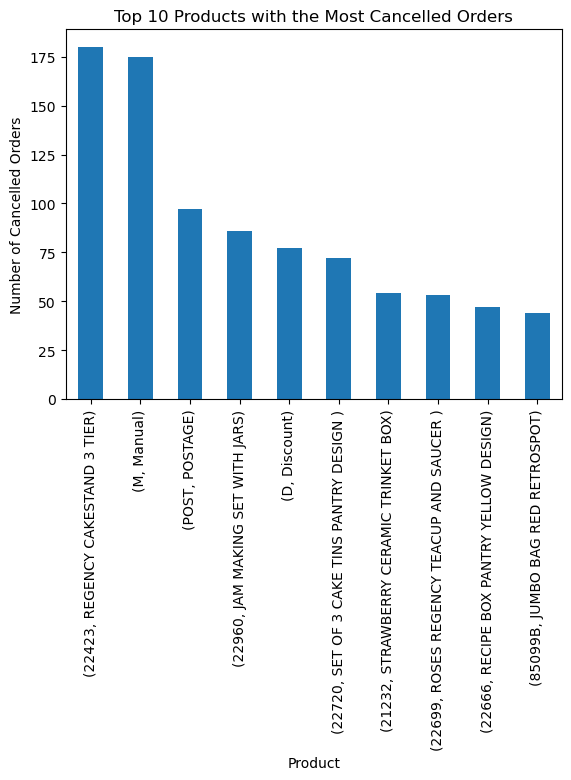

In [383]:
# 1. Исследуйте распределение отмененных заказов по времени (столбец "InvoiceDate")
# Преобразуйте столбец "InvoiceDate" в тип datetime
df_with_cancellation['InvoiceDate'] = pd.to_datetime(df_with_cancellation['InvoiceDate'])
print(df_with_cancellation['InvoiceDate'].max())
# Создайте столбец "Month" для группировки по месяцам
df_with_cancellation['Month'] = df_with_cancellation['InvoiceDate'].dt.to_period('M')

# Группируйте данные по месяцам и подсчитайте количество отмененных заказов в каждом месяце
cancelled_orders_by_month = df_with_cancellation.groupby('Month')['InvoiceNo'].count()

# Визуализируйте распределение отмененных заказов по месяцам
cancelled_orders_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Orders')
plt.title('Distribution of Cancelled Orders by Month')
plt.show()

# 2. Исследуйте распределение отмененных заказов по странам (столбец "Country")
# Группируйте данные по странам и подсчитайте количество отмененных заказов в каждой стране
cancelled_orders_by_country = df_with_cancellation.groupby('Country')['InvoiceNo'].count()

# Визуализируйте распределение отмененных заказов по странам
cancelled_orders_by_country.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Cancelled Orders')
plt.title('Distribution of Cancelled Orders by Country')
plt.show()

# 3. Исследуйте распределение отмененных заказов по товарам (столбцы "StockCode" и "Description")
# Группируйте данные по товарам и подсчитайте количество отмененных заказов для каждого товара
cancelled_orders_by_product = df_with_cancellation.groupby(['StockCode', 'Description'])['InvoiceNo'].count()

# Отсортируйте товары по количеству отмененных заказов в порядке убывания
cancelled_orders_by_product = cancelled_orders_by_product.sort_values(ascending=False)

# Визуализируйте топ-10 товаров с наибольшим количеством отмененных заказов
top_10_cancelled_products = cancelled_orders_by_product.head(10)
top_10_cancelled_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Number of Cancelled Orders')
plt.title('Top 10 Products with the Most Cancelled Orders')
plt.show()

Average Quantity in Cancelled Orders: 10.1808
Average Quantity in Non-cancelled Orders: 11.9807
Average Price in Cancelled Orders: 4.7795
Average Price in Non-cancelled Orders: 2.8998


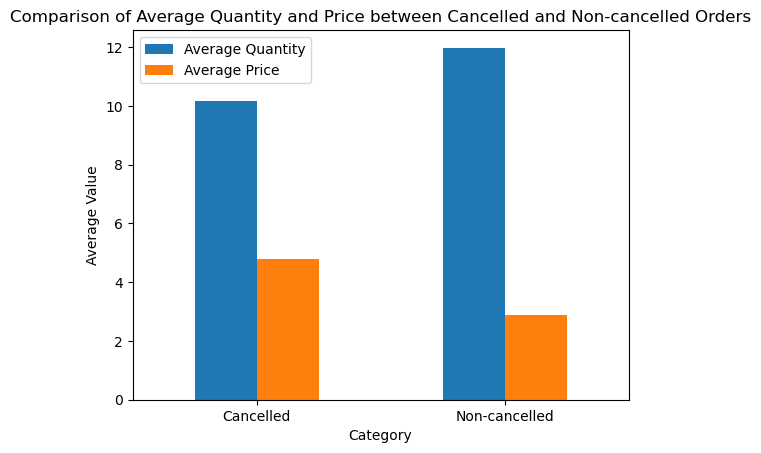

In [318]:
# 1. Сравните средние значения количества товаров в отмененных и неотмененных заказах
mean_quantity_cancelled = abs(df_with_cancellation['Quantity'].mean())
mean_quantity_non_cancelled = df_non_cancelled['Quantity'].mean()

print("Average Quantity in Cancelled Orders:", mean_quantity_cancelled.round(4))
print("Average Quantity in Non-cancelled Orders:", mean_quantity_non_cancelled.round(4))

# 2. Сравните средние значения цен товаров в отмененных и неотмененных заказах
mean_price_cancelled = df_with_cancellation['UnitPrice'].mean()
mean_price_non_cancelled = df_non_cancelled['UnitPrice'].mean()

print("Average Price in Cancelled Orders:", mean_price_cancelled.round(4))
print("Average Price in Non-cancelled Orders:", mean_price_non_cancelled.round(4))

# 3. Визуализируйте сравнение средних значений количества товаров и цен
means_data = {
    'Category': ['Cancelled', 'Non-cancelled'],
    'Average Quantity': [mean_quantity_cancelled, mean_quantity_non_cancelled],
    'Average Price': [mean_price_cancelled, mean_price_non_cancelled]
}

means_df = pd.DataFrame(means_data)

means_df.plot(x='Category', kind='bar', rot=0)
plt.ylabel('Average Value')
plt.title('Comparison of Average Quantity and Price between Cancelled and Non-cancelled Orders')
plt.show()

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



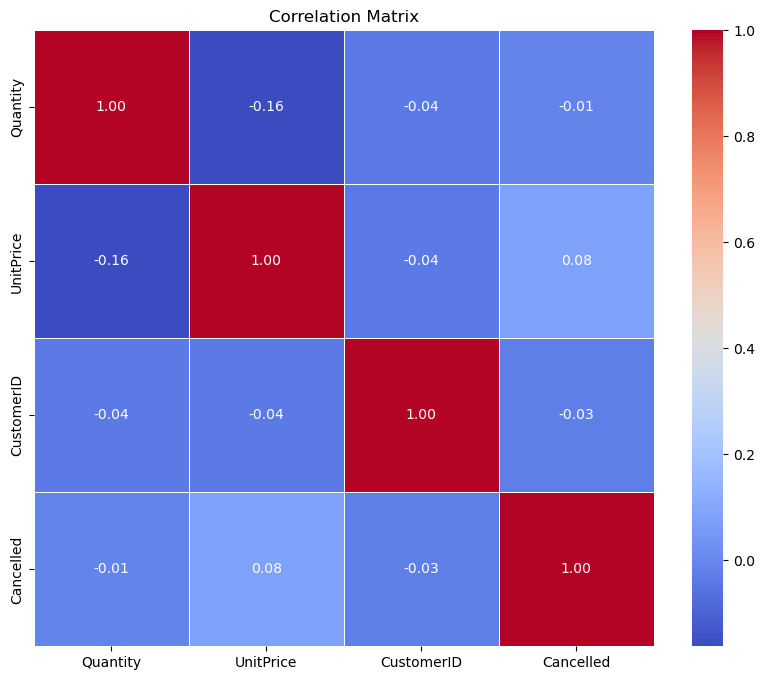

In [308]:
df_with_cancellation['Cancelled'] = 1
df_non_cancelled['Cancelled'] = 0

# Объедините два датасета в один для анализа
combined_df = pd.concat([df_with_cancellation, df_non_cancelled], ignore_index=True)

# Проведите корреляционный анализ для числовых данных в датасете
correlation_matrix = combined_df.corr()

# Визуализируйте матрицу корреляции в виде тепловой карты
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [69]:
# working with canceled orders (contain 'C' in Invoice)
(df_online_retail['InvoiceNo'].str.startswith('C'))==True

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [95]:
df_canceled_order = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_canceled_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [115]:
tt = df_canceled_order.groupby('Description').agg({'InvoiceDate': 'count'}).sort_values('InvoiceDate', ascending=False)

px.bar(tt)
tt

,InvoiceDate
Description,
Manual,244
REGENCY CAKESTAND 3 TIER,181
POSTAGE,126
JAM MAKING SET WITH JARS,87
Discount,77
...,...
MAGIC SHEEP WOOL GROWING FROM PAPER,1
MAGIC TREE -PAPER FLOWERS,1
MAGNETS PACK OF 4 HOME SWEET HOME,1


In [116]:
df_no_cancel = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

In [118]:
# Шаг 1: Создаем датасет с отмененными заказами (заказами, номера которых содержат "C")
cancelled_orders = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]

# Шаг 2: Из исходного датасета выбираем только заказы с типами из отмененных, но не содержащих "C"
# ~data.InvoiceNo.str.contains('C', na=False) вернет булеву серию, где True - это заказы без "C"
orders_without_cancellation = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

# Выводим датасет с отмененными заказами
print("Отмененные заказы:")
print(cancelled_orders)

# Выводим датасет с заказами без отмены, но не содержащими "C"
print("Заказы без отмены, но без 'C':")
print(orders_without_cancellation)

Отмененные заказы:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:4

In [126]:
cancelled_items_list = cancelled_orders['Description'].unique()
items_dataset = orders_without_cancellation[orders_without_cancellation['Description'].isin(cancelled_items_list)]
items_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [135]:
qwe = cancelled_orders.groupby('Description').agg({'Quantity':'count'}).sort_values('Quantity', ascending=False).reset_index()
qwe

,Description,Quantity
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
...,...,...
1967,MAGIC SHEEP WOOL GROWING FROM PAPER,1
1968,MAGIC TREE -PAPER FLOWERS,1
1969,MAGNETS PACK OF 4 HOME SWEET HOME,1
1970,MAKE YOUR OWN FLOWERPOWER CARD KIT,1


In [134]:
rty = items_dataset.groupby('Description').agg({'Quantity':'count'}).sort_values('Quantity', ascending=False).reset_index()
rty

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,REGENCY CAKESTAND 3 TIER,2019
3,PARTY BUNTING,1707
4,LUNCH BAG RED RETROSPOT,1594
...,...,...
1951,BLUE MONTE CARLO HANDBAG,1
1952,BLUE PADDED SOFT MOBILE,1
1953,PINK SMALL GLASS CAKE STAND,1
1954,PINK CHERRY LIGHTS,1


In [137]:
from scipy.stats import pearsonr, spearmanr

In [138]:
# Объединяем два датасета по столбцу 'Description'
merged_df = pd.merge(qwe, rty, on='Description', suffixes=('_qwe', '_rty'))

# Вычисляем коэффициент корреляции Пирсона и Спирмена
pearson_corr, _ = pearsonr(merged_df['Quantity_qwe'], merged_df['Quantity_rty'])
spearman_corr, _ = spearmanr(merged_df['Quantity_qwe'], merged_df['Quantity_rty'])

# Выводим результаты
print(f"Коэффициент корреляции Пирсона: {pearson_corr}")
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

Коэффициент корреляции Пирсона: 0.45812788031588325
Коэффициент корреляции Спирмена: 0.5304908257688495


In [93]:
df_online_retail.query('CustomerID == 14397.0 and InvoiceNo == "581490"')

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [65]:
df_online_retail.InvoiceNo.str.contains('C', na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [6]:
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])


In [7]:
df_online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [309]:
# Calculate the total order amount for each row (UnitPrice * Quantity)
df_online_retail['TotalPrice'] = df_online_retail['UnitPrice'] * df_online_retail['Quantity']

# Group the data by 'Country' and calculate the total order amount for each country
country_order_amount = df_online_retail.groupby('Country')['TotalPrice'] \
                                       .sum() \
                                       .reset_index()

# Calculate the percentage for each country
total_amount_sum = country_order_amount['TotalPrice'].sum()
country_order_amount['Percentage'] = (country_order_amount['TotalPrice'] / total_amount_sum) * 100

# Sort the DataFrame by 'Percentage' column in descending order
country_order_amount = country_order_amount.sort_values(by='Percentage', ascending=False) \
                                           .reset_index(drop=True)

# Threshold for "Other countries" category
threshold_percentage = 2.0

# Group small countries into "Other countries" category
other_countries_total_amount = country_order_amount[country_order_amount['Percentage'] < threshold_percentage]['TotalPrice'] \
                               .sum()
other_countries_percentage = (other_countries_total_amount / total_amount_sum) * 100

# Create a DataFrame for the "Other countries" category
other_countries_df = pd.DataFrame({'Country': ['Other countries'], 
                                   'TotalPrice': [other_countries_total_amount], 
                                   'Percentage': [other_countries_percentage]}
                                 )

# Combine the "Other countries" DataFrame with the main DataFrame, excluding small countries
filtered_country_order_amount = country_order_amount[country_order_amount['Percentage'] >= threshold_percentage]
country_order_amount = pd.concat([filtered_country_order_amount, other_countries_df]).reset_index(drop=True)

# Display 
country_order_amount

,Country,TotalPrice,Percentage
0,United Kingdom,6839452.484,81.403990
1,Netherlands,272548.520,3.243905
2,EIRE,269401.530,3.206450
3,Germany,230715.150,2.746000
4,France,200307.725,2.384087
5,Other countries,589438.510,7.015568


In [310]:
# Create a bar chart
fig_bar = px.bar(country_order_amount, x='TotalPrice', y='Country',
             text='TotalPrice', orientation='h',
             title='Total Order Amount by Country',
             labels={'TotalPrice': 'Total Order Price (£)', 'Country': 'Country'},
             color='Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )

# Update the layout to display percentage labels inside the bars
fig_bar.update_traces(width=0.9, texttemplate='%{text:.0f}£', textposition='outside')

# Update the layout to change the size of the chart
fig_bar.update_layout(width=800, height=600)  

# Adjust the scale of the X-axis 
fig_bar.update_xaxes(range=[0, country_order_amount['TotalPrice'].max()*1.3])

# Show the plot
fig_bar.show()

**ADD PIE PLOT**

In [311]:
# Create a pie chart
fig_pie = px.pie(country_order_amount, values='Percentage', names='Country',
             title='Percentage of Total Order Price by Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )
# Update the layout to change the size of the chart
fig_pie.update_layout(width=600, height=600)  

# Show the plot
fig_pie.show()

In [16]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save

# Создание случайных данных для примера
np.random.seed(42)
countries = ['USA', 'Canada', 'Germany', 'France', 'UK']
total_prices = np.random.randint(100, 1000, size=len(countries))
percentages = np.random.uniform(0, 100, size=len(countries))

country_order_amount = pd.DataFrame({
    'Country': countries,
    'TotalPrice': total_prices,
    'Percentage': percentages
})

# Интерактивная круговая диаграмма
pie_chart = alt.Chart(country_order_amount).mark_circle().encode(
    alt.X('Country:N'),
    alt.Y('Percentage:Q'),
    size='TotalPrice:Q',
    color='Country:N',
    tooltip=['Country', 'Percentage', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Интерактивная столбчатая диаграмма
bar_chart = alt.Chart(country_order_amount).mark_bar().encode(
    alt.X('Country:N'),
    alt.Y('TotalPrice:Q'),
    color='Country:N',
    tooltip=['Country', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Объединение двух графиков
charts = pie_chart | bar_chart

# Сохранение и отображение графиков в виде HTML
output_file = "interactive_charts.html"
save(charts, output_file)


In [54]:
?? px.update_traces()

Object ` px.update_traces()` not found.


In [12]:
df_online_retail['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [13]:
orders_per_customer = df_online_retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the column to 'OrderCount' for clarity
orders_per_customer.rename(columns={'InvoiceNo': 'OrderCount'}, inplace=True)

# Sort the DataFrame by 'OrderCount'
orders_per_customer.sort_values('OrderCount', inplace=True, ascending=False)
orders_per_customer

,CustomerID,OrderCount
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [14]:
df_online_retail.query('')

ValueError: expr cannot be an empty string

In [ ]:
df_online_retail.query('CustomerID == 14911.0')

In [ ]:
??pd.DataFrame.sort_values

In [ ]:
df_online_retail

In [ ]:
df_online_retail.groupby('CustomerID') \
    .agg({'TotalAmount': 'sum'}).reset_index()

In [ ]:
df_online_retail.query('CustomerID == 12347.0')

In [ ]:
df_online_retail.query('TotalAmount < 0')